Running PCA for time series data for patterns.

In [1]:
#loading libraries
library(here)
library(dplyr)
library(tidyr)
library(diann)
library(readr)
library(pheatmap)
library(openxlsx)
library(rstatix)
library(FactoMineR)
library(factoextra)

data.dir<-"Proj2024July"
output.dir<-"Proj2024July"

source(here("functions.R"))# note for jupyter notebook, we need to do something different
    # because we can not start everything from the root of the project, but inside
    # subfolder (so when we do getwd, we will be get the subfolder). "here" can take
    # care of this nicely (because of the .Rprofile in the folder), so we need to 
    # use here wherever we can!!!

here() starts at /home/jovyan/ms_analysis


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ stringr 1.5.0
✔ purrr   1.0.1     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ rstatix::filter() masks dplyr::filter(), stats::filter()
✖ dplyr::lag()      masks stats::lag()


In [2]:
#showing the locations and how here does!!
getwd()
here()

[1] "/home/jovyan/ms_analysis/Proj2024July"

[1] "/home/jovyan/ms_analysis"

In [3]:
#Start loading data
#x<-here(output.dir,"Trend.vista_vs_ctrl.RDS")
vista_ctrl<-readRDS(file=here(output.dir,"Trend.time.RDS"))
#vistaSNS101_ctrl<-readRDS(file=here(output.dir,"Trend.vistaSns101_vs_ctrl.RDS"))
#vistaSNS101_vista<-readRDS(file=here(output.dir,"Trend.vista_vs_vistaSNS101.RDS"))

head(vista_ctrl)

cat("the data table dimension:",dim(vista_ctrl),"\n")


Protein.Group,Genes,0min,5min,10min,15min,20min
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A0A024RBG1;Q9NZJ9-2,NUDT4B;NUDT4,-2.379396e-07,0.00000000,0.00000000,3.79832085,0.00000000
A0A087WT03,TRAV26-1,-1.932804e-06,5.06941474,0.49879677,5.66069786,5.25555706
A0A0B4J245,TRAV12-1,3.780248e-07,12.58675615,11.35523615,11.90086437,11.16272232
A0A0B4J2D5;P0DPI2,GATD3B;GATD3,1.316651e-06,0.08892211,-0.05846825,-0.06488321,-0.08398498
A0A0B4J2E0;P01733,TRBV12-4;TRBV12-3,9.915800e-08,1.13484258,0.55368712,0.59037582,0.70264312
A0A0B4J2F0,PIGBOS1,-1.734846e-06,0.94999480,0.59288530,0.73074299,0.83641884


the data table dimension: 6759 7 


As a good practise, we want to do scaling on the data to make all time points contribute equally, but in this case, we can not do that, since the data are difference from the control data. In this sense, they are already centered. But should we further scale them? Not sure.


## First try on time effect relative to 0mins

In [4]:
#vista_ctrl.scaled<-
#    scale(vista_ctrl[,c("0.5","2","6","12","24")])
#vista_ctrl.scaled<-bind_cols(vista_ctrl[,c(1:3)],vista_ctrl.scaled)
#head(vista_ctrl)

#now let's do PCA first.
vista_ctrl.matrix<-vista_ctrl[,-c(1:2)]

pca.vista_ctrl<-princomp(vista_ctrl.matrix)

In [5]:
summary(pca.vista_ctrl)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4       Comp.5
Standard deviation     3.3934399 1.3966040 1.2912285 1.17648445 1.006725e-06
Proportion of Variance 0.6971731 0.1180883 0.1009408 0.08379781 6.135953e-14
Cumulative Proportion  0.6971731 0.8152614 0.9162022 1.00000000 1.000000e+00

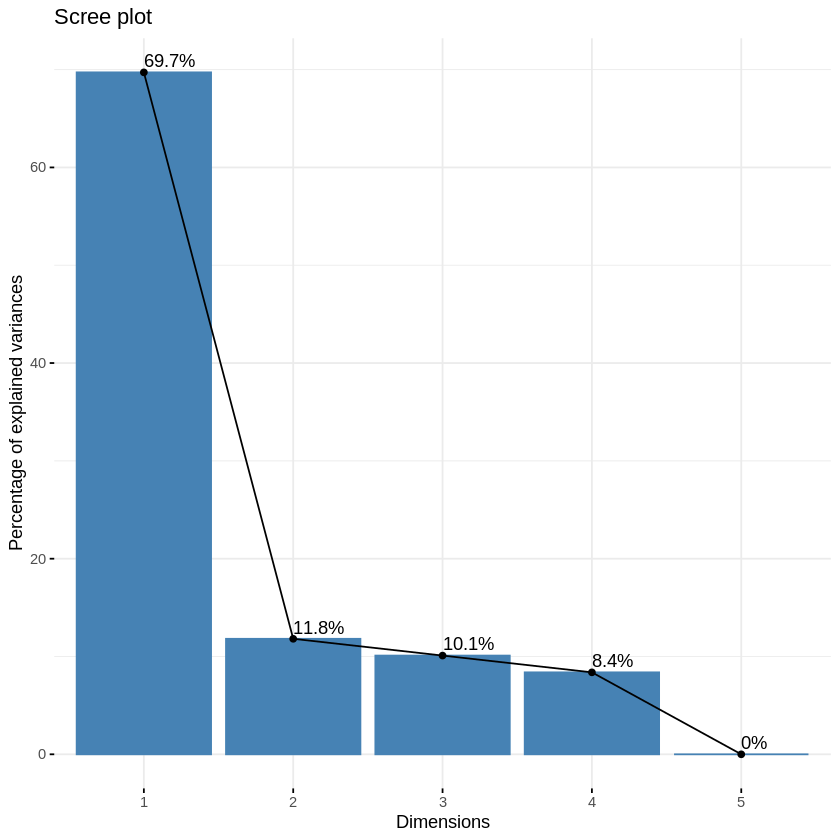

In [6]:
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

fviz_eig(pca.vista_ctrl, addlabels = TRUE)

png 
  2

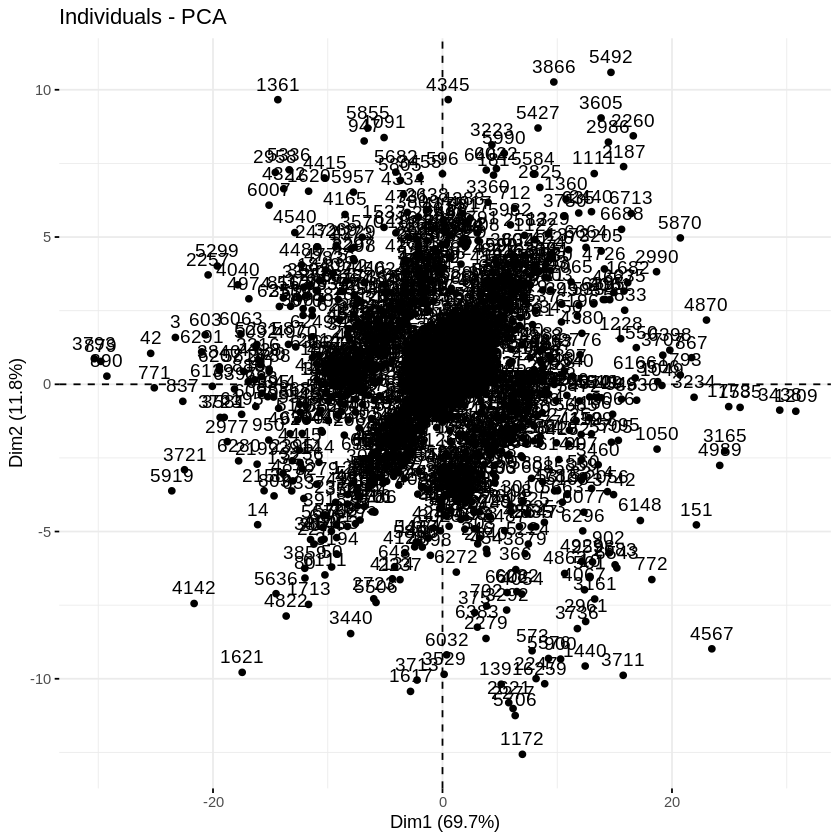

In [7]:
print(fviz_pca_ind(pca.vista_ctrl))

#save it 
pdf(file="PCA_geneInd_pattern_time.pdf", width=7, height=7)
print(fviz_pca_ind(pca.vista_ctrl))
dev.off()

png 
  2

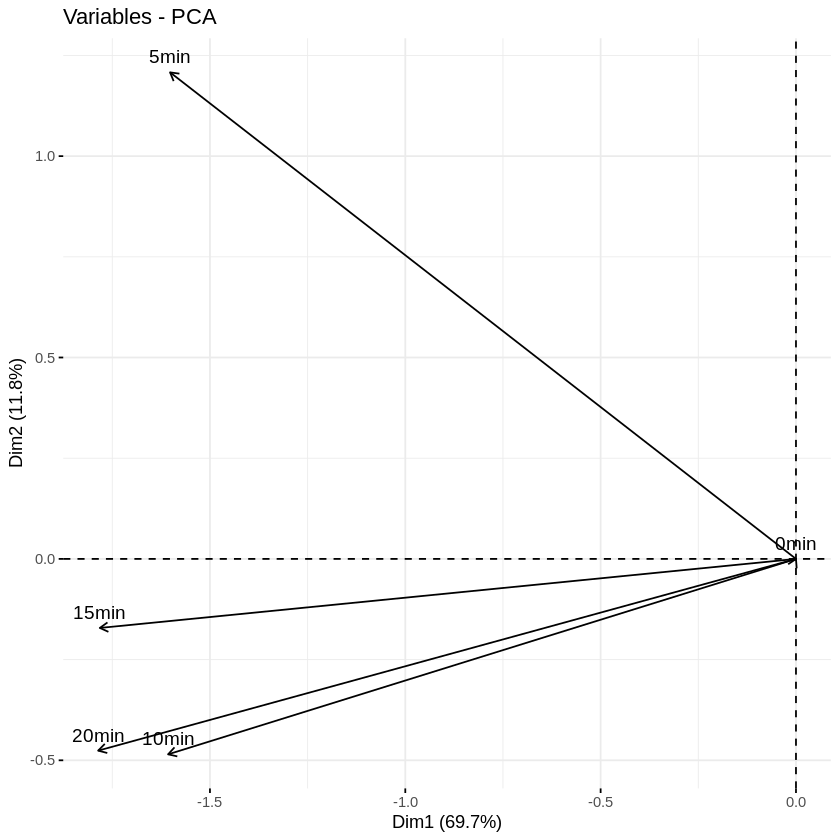

In [8]:
# do by time points
fviz_pca_var(pca.vista_ctrl)

pdf(file="PCA_varTimepoint_pattern_time.pdf", width=7, height=7)
print(fviz_pca_var(pca.vista_ctrl))
dev.off()

A very interesting pattern. It means to me that after 5 minutes, there are already a lot of dramatic changes. Winthin the next 5 mins things continue to change, but with less magnitude. After the first 10 mins, the changes are slowing down very much. 



Done for now!!

In [9]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices datasets  utils     methods   base     

other attached packages:
 [1] forcats_0.5.2    stringr_1.5.0    purrr_1.0.1      tibble_3.1.8    
 [5] tidyverse_1.3.2  factoextra_1.0.7 ggplot2_3.4.0    FactoMineR_2.8  
 [9] rstatix_0.7.2    openxlsx_4.2.5.2 pheatmap_1.0.12  readr_2.1.3     
[13] diann_1.0.1      tidyr_1.3.0      dplyr_1.0.10     here_1.0.1      

loaded via a namespace (and not atta